<a href="https://colab.research.google.com/github/gflores1092/ClasesML/blob/main/Mi_primer_proyecto_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de machine learning para predecir precios de hogares

In [ ]:
# Librerias
import pandas as pd
import numpy as np

In [ ]:
# Leer datos
datos = pd.read_csv('/content/housing.csv')

In [ ]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Explorar los datos

In [ ]:
datos.shape

(20640, 10)

In [ ]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
datos.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# Separar datos
# Features: columnas que van a predecir cierto valor
# Target: columna que se va a predecir

In [ ]:
# Features: 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
#           'total_bedrooms', 'population', 'households', 'median_income',
#           'ocean_proximity'
# Target: 'median_house_value'

In [ ]:
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
X['ocean_proximity'].drop_duplicates()

,ocean_proximity
0,NEAR BAY
701,<1H OCEAN
954,INLAND
1850,NEAR OCEAN
8314,ISLAND


In [ ]:
X['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [ ]:
columna_codif = pd.get_dummies(X['ocean_proximity']).astype(int)

In [ ]:
X = pd.concat([X.drop(['ocean_proximity'], axis=1), columna_codif], axis=1)

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
# Revisar correlación entre variables

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

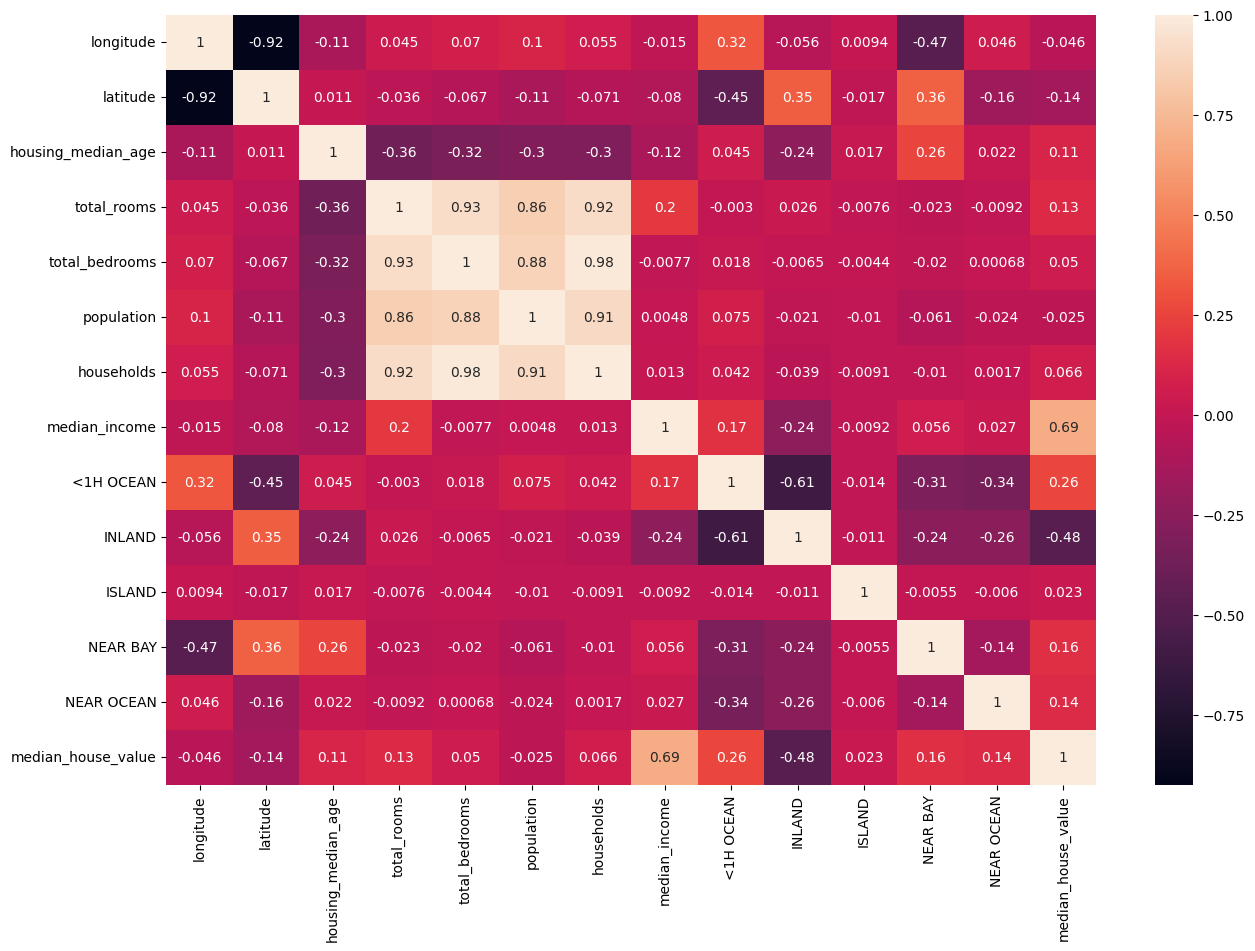

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Separar datos en train y test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separar nuestros datos en estos sets
# Train: Datos de entrenamiento
# Test: Datos de testeo
# X = X_train + X_test
# y = y_train + y_test

In [ ]:
# Separar datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(20640, 13)

In [ ]:
X_train.shape

(16512, 13)

In [ ]:
X_test.shape

(4128, 13)

In [ ]:
y.shape

(20640,)

In [ ]:
y_train.shape

(16512,)

In [ ]:
y_test.shape

(4128,)

In [ ]:
# Revisar datos nulos (imputar datos)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
X_train_imp = imputer.fit_transform(X_train)

In [ ]:
X_test_imp = imputer.fit_transform(X_test)

In [ ]:
X_train_imp

array([[-117.03,   32.71,   33.  , ...,    0.  ,    0.  ,    1.  ],
       [-118.16,   33.77,   49.  , ...,    0.  ,    0.  ,    1.  ],
       [-120.48,   34.66,    4.  , ...,    0.  ,    0.  ,    1.  ],
       ...,
       [-118.38,   34.03,   36.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.96,   37.58,   15.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.42,   37.77,   52.  , ...,    0.  ,    1.  ,    0.  ]])

In [ ]:
X_test_imp

array([[-119.01,   36.06,   25.  , ...,    0.  ,    0.  ,    0.  ],
       [-119.46,   35.14,   30.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.44,   37.8 ,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-122.05,   37.31,   25.  , ...,    0.  ,    0.  ,    0.  ],
       [-119.76,   36.77,   36.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.37,   34.22,   17.  , ...,    0.  ,    0.  ,    0.  ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scl = scaler.fit_transform(X_train_imp)

In [ ]:
X_train_scl

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

In [ ]:
X_test_scl = scaler.fit_transform(X_test_imp)

In [ ]:
X_test_scl

array([[ 0.25541734,  0.22194113, -0.30073951, ..., -0.01556621,
        -0.34364687, -0.40106719],
       [ 0.02976613, -0.20947715,  0.098724  , ..., -0.01556621,
        -0.34364687, -0.40106719],
       [-1.46454628,  1.03788441,  1.85636346, ..., -0.01556621,
         2.9099639 , -0.40106719],
       ...,
       [-1.2689819 ,  0.80810728, -0.30073951, ..., -0.01556621,
        -0.34364687, -0.40106719],
       [-0.120668  ,  0.5548835 ,  0.57808022, ..., -0.01556621,
        -0.34364687, -0.40106719],
       [ 0.57634349, -0.64089543, -0.93988113, ..., -0.01556621,
        -0.34364687, -0.40106719]])

# Entrenar nuestro modelo

# Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train_scl, y_train)

LinearRegression()

In [ ]:
y_pred = linear.predict(X_test_scl)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Evaluar el modelo
r2_score(y_test, y_pred)

0.6249789027848447

In [ ]:
mean_squared_error(y_test, y_pred)

4914310128.204927

In [ ]:
pd.concat([pd.DataFrame(X_test).reset_index(drop=True),
           pd.DataFrame(y_test).reset_index(drop=True),
           pd.DataFrame(y_pred).reset_index(drop=True)],
          axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,0
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,0,1,0,0,0,47700.0,65574.116137
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,0,1,0,0,0,45800.0,136113.411711
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,0,0,0,1,0,500001.0,268409.986303
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,1,0,0,0,0,218600.0,281177.081965
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,0,0,0,0,1,278000.0,275319.434903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,1,0,0,0,0,263300.0,223427.470390
4124,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,0,0,0,0,1,266800.0,245745.800125
4125,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,1,0,0,0,0,500001.0,444287.869245
4126,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,0,1,0,0,0,72300.0,122857.632301


In [ ]:
# Arbol de decision
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=5)

In [ ]:
decision_tree.fit(X_train_scl, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
y_pred_t = decision_tree.predict(X_test_scl)

In [ ]:
# Evaluar el modelo
r2_score(y_test, y_pred_t)

0.595976265939641

In [ ]:
mean_squared_error(y_test, y_pred_t)

5294363285.351081

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)

In [ ]:
random_forest.fit(X_train_scl, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_r = random_forest.predict(X_test_scl)

In [ ]:
# Evaluar el modelo
r2_score(y_test, y_pred_r)

0.7149442271188282

In [ ]:
mean_squared_error(y_test, y_pred_r)

3735396440.828864

In [ ]:
# xgboost
from xgboost import XGBRegressor

In [ ]:
xg_boost = XGBRegressor(random_state=42, n_estimators=100)

In [ ]:
xg_boost.fit(X_train_scl, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_x = xg_boost.predict(X_test_scl)

In [ ]:
# Evaluar el modelo
r2_score(y_test, y_pred_x)

0.6284804450216479

In [ ]:
mean_squared_error(y_test, y_pred_x)

4868425604.356961

In [ ]:
# Multi layer perceptron
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp_regressor = MLPRegressor(random_state=42, max_iter=1000)

In [ ]:
mlp_regressor.fit(X_train_scl, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [ ]:
y_pred_mlp = mlp_regressor.predict(X_test_scl)

In [ ]:
# Evaluar el modelo
r2_score(y_test, y_pred_mlp)

0.6354088153407867

In [ ]:
mean_squared_error(y_test, y_pred_mlp)

4777635617.649189